In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import citipy
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
import requests
requests.__version__

'2.26.0'

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46b5180765b557381492a6d9a78cd8af


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | ostrovnoy
Processing Record 5 of Set 1 | vila franca do campo
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | vardo
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | vestmanna
Processing Record 11 of Set 1 | marcona
City not found. Skipping...
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | vitim
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 20 of Set 1 | haines junction
Processing Rec

Processing Record 37 of Set 4 | ushtobe
Processing Record 38 of Set 4 | prince rupert
Processing Record 39 of Set 4 | saint-philippe
Processing Record 40 of Set 4 | solnechnyy
Processing Record 41 of Set 4 | jumla
Processing Record 42 of Set 4 | abaete
Processing Record 43 of Set 4 | faya
Processing Record 44 of Set 4 | tuatapere
Processing Record 45 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 46 of Set 4 | itarema
Processing Record 47 of Set 4 | whitehorse
Processing Record 48 of Set 4 | wawa
Processing Record 49 of Set 4 | freeport
Processing Record 50 of Set 4 | esperance
Processing Record 1 of Set 5 | aitape
Processing Record 2 of Set 5 | ponta do sol
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | sambava
Processing Record 5 of Set 5 | kenai
Processing Record 6 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 7 of Set 5 | olafsvik
Processing Record 8 of Set 5 | bagan
Processing Record 9 of Set 5 | terrace
Process

Processing Record 25 of Set 8 | gananoque
Processing Record 26 of Set 8 | prado
Processing Record 27 of Set 8 | xinzhou
Processing Record 28 of Set 8 | belmonte
Processing Record 29 of Set 8 | poum
Processing Record 30 of Set 8 | ancud
Processing Record 31 of Set 8 | faanui
Processing Record 32 of Set 8 | fairbanks
Processing Record 33 of Set 8 | camana
Processing Record 34 of Set 8 | tiznit
Processing Record 35 of Set 8 | aleksandrovskiy zavod
Processing Record 36 of Set 8 | catabola
Processing Record 37 of Set 8 | antofagasta
Processing Record 38 of Set 8 | mahebourg
Processing Record 39 of Set 8 | almaznyy
Processing Record 40 of Set 8 | sur
Processing Record 41 of Set 8 | abhar
Processing Record 42 of Set 8 | lensk
Processing Record 43 of Set 8 | beloha
Processing Record 44 of Set 8 | candelaria
Processing Record 45 of Set 8 | gimli
Processing Record 46 of Set 8 | vao
Processing Record 47 of Set 8 | khor
Processing Record 48 of Set 8 | itum-kale
Processing Record 49 of Set 8 | sain

Processing Record 16 of Set 12 | kedrovyy
Processing Record 17 of Set 12 | san quintin
Processing Record 18 of Set 12 | pontianak
Processing Record 19 of Set 12 | rocha
Processing Record 20 of Set 12 | saint-georges
Processing Record 21 of Set 12 | rafaela
Processing Record 22 of Set 12 | galle
Processing Record 23 of Set 12 | morwa
Processing Record 24 of Set 12 | karaul
City not found. Skipping...
Processing Record 25 of Set 12 | gidole
Processing Record 26 of Set 12 | namie
Processing Record 27 of Set 12 | codrington
Processing Record 28 of Set 12 | saint-jerome
Processing Record 29 of Set 12 | bud
Processing Record 30 of Set 12 | udimskiy
Processing Record 31 of Set 12 | galgani
City not found. Skipping...
Processing Record 32 of Set 12 | dharmadam
Processing Record 33 of Set 12 | toora-khem
Processing Record 34 of Set 12 | eenhana
Processing Record 35 of Set 12 | paka
Processing Record 36 of Set 12 | cayenne
Processing Record 37 of Set 12 | hunza
City not found. Skipping...
Proces

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,67.12,76,63,6.51,ZA,2022-04-05 19:33:52
1,Carnarvon,-24.8667,113.6333,71.67,83,0,10.36,AU,2022-04-05 19:35:28
2,Puerto Ayora,-0.7393,-90.3518,84.16,87,51,5.01,EC,2022-04-05 19:35:29
3,Ostrovnoy,68.0531,39.5131,25.79,87,100,14.12,RU,2022-04-05 19:32:36
4,Vila Franca Do Campo,37.7167,-25.4333,59.41,67,23,4.25,PT,2022-04-05 19:35:29
5,Port Elizabeth,-33.9180,25.5701,66.49,69,0,18.41,ZA,2022-04-05 19:32:29
6,Cidreira,-30.1811,-50.2056,69.75,71,22,8.93,BR,2022-04-05 19:35:07
7,Vardo,70.3705,31.1107,31.98,80,75,27.63,NO,2022-04-05 19:35:30
8,Vestmanna,62.1564,-7.1664,32.92,60,75,11.50,FO,2022-04-05 19:35:31
9,Castro,-24.7911,-50.0119,73.20,81,29,1.61,BR,2022-04-05 19:32:02


In [12]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2022-04-05 19:33:52,-33.0153,27.9116,67.12,76,63,6.51
1,Carnarvon,AU,2022-04-05 19:35:28,-24.8667,113.6333,71.67,83,0,10.36
2,Puerto Ayora,EC,2022-04-05 19:35:29,-0.7393,-90.3518,84.16,87,51,5.01
3,Ostrovnoy,RU,2022-04-05 19:32:36,68.0531,39.5131,25.79,87,100,14.12
4,Vila Franca Do Campo,PT,2022-04-05 19:35:29,37.7167,-25.4333,59.41,67,23,4.25
5,Port Elizabeth,ZA,2022-04-05 19:32:29,-33.9180,25.5701,66.49,69,0,18.41
6,Cidreira,BR,2022-04-05 19:35:07,-30.1811,-50.2056,69.75,71,22,8.93
7,Vardo,NO,2022-04-05 19:35:30,70.3705,31.1107,31.98,80,75,27.63
8,Vestmanna,FO,2022-04-05 19:35:31,62.1564,-7.1664,32.92,60,75,11.50
9,Castro,BR,2022-04-05 19:32:02,-24.7911,-50.0119,73.20,81,29,1.61


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

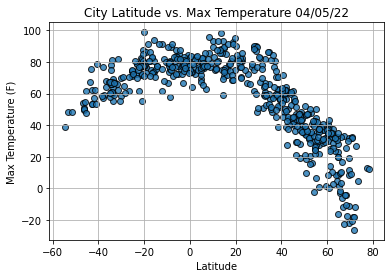

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

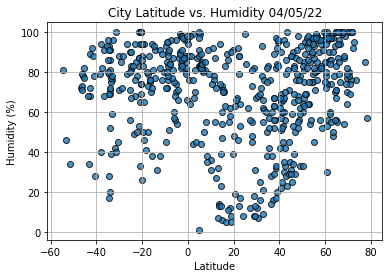

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

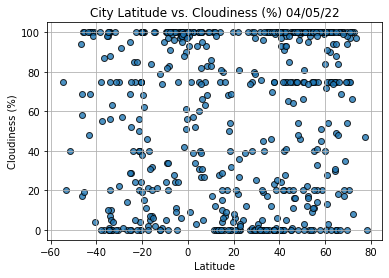

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

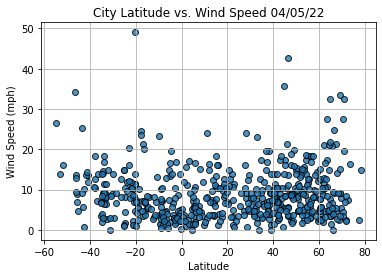

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Creating DataFrame from City_Data
index13 = city_data_df.loc[13]
index13

City                        Vitim
Country                        RU
Date          2022-04-05 19:35:32
Lat                       59.4511
Lng                      112.5578
Max Temp                     1.44
Humidity                      100
Cloudiness                     99
Wind Speed                   2.17
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
552     True
553     True
554     True
555     True
556     True
Name: Lat, Length: 557, dtype: bool

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

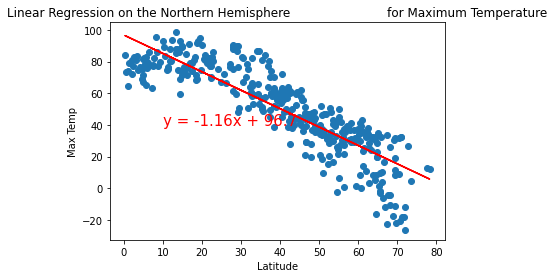

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

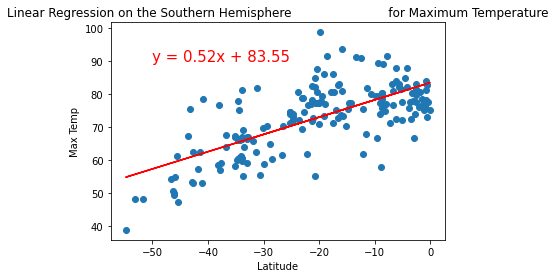

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

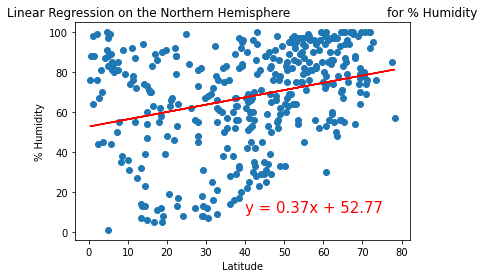

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

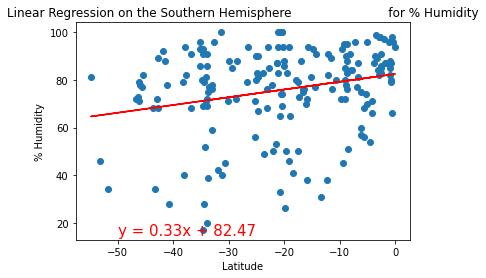

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

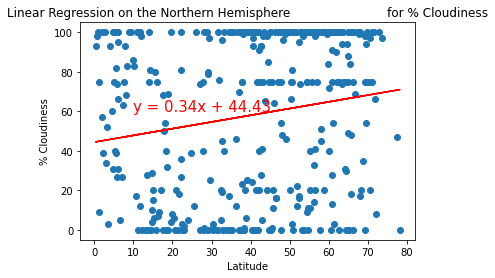

In [39]:
# Linear regression on Cloudiness for Northhern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

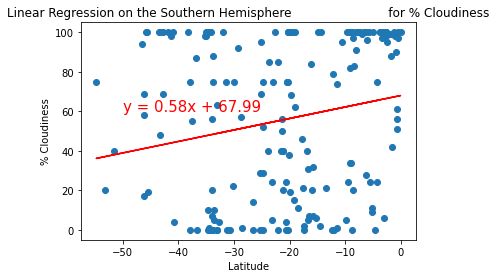

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

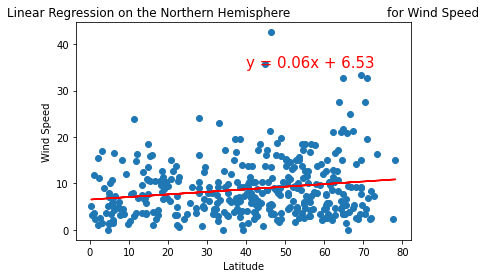

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

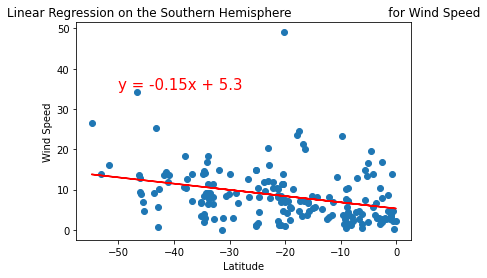

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))